Car Number Plate Prediction


Installing required libraries

In [1]:
!pip install easyocr
!pip install imutils


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.2 MB/s eta 0:00:00


Installing other required packages


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


Importing image that has car number plate

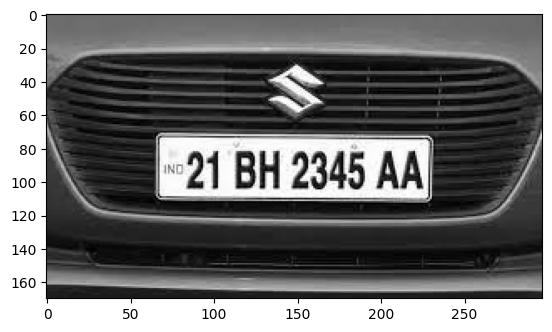

In [ ]:
img = cv2.imread('images5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))



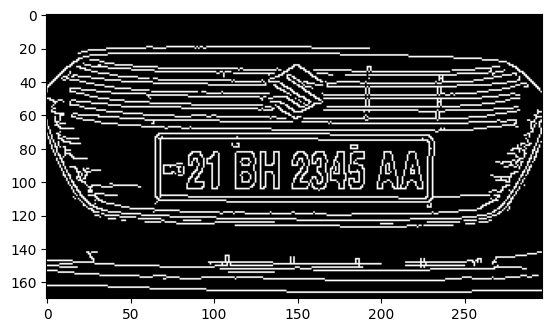

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


Finding location using contours

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


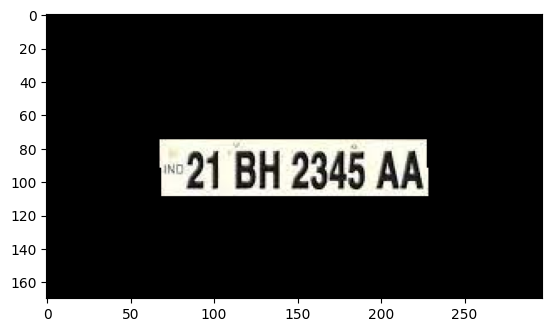

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))



In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]



Displaying number plate in required format

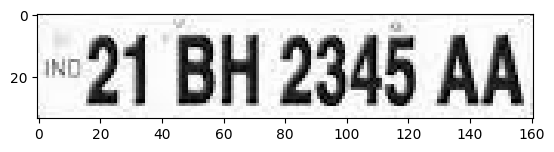

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[11, 1], [161, 1], [161, 34], [11, 34]],
  '21 BH 2345 AA',
  0.7191464660439942)]

Comapring the obtainer result with original image

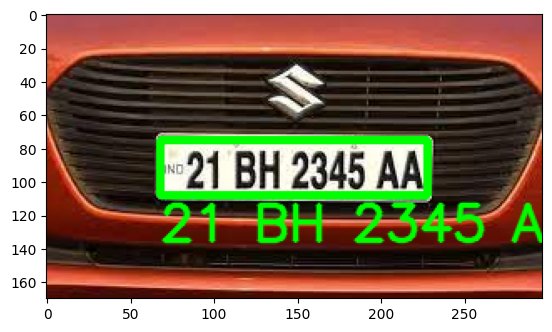

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))



Explanation

Steps involved in this project are :

1. Data Collection: The first step is to gather a large and diverse dataset of images containing vehicles with visible license plates. This dataset should include different lighting conditions, angles, and variations in license plate designs to ensure the model can generalize well.

2. Data Preprocessing: Once you have collected the dataset, you need to preprocess the images to enhance their quality and extract the license plate regions. This may involve tasks such as resizing, normalization, noise reduction, and applying image segmentation techniques to isolate the license plate areas.

3. License Plate Localization: The next step is to develop an algorithm or model that can accurately detect and localize the license plates within the preprocessed images. This can be achieved using object detection techniques such as convolutional neural networks (CNNs) or other computer vision algorithms.

4. Character Segmentation: After localizing the license plate, you need to segment the individual characters present on the plate. This step involves separating the alphanumeric characters from the background and any other artifacts. Different techniques such as contour analysis, edge detection, or connected component analysis can be employed for character segmentation.

5. Character Recognition: Once the characters are segmented, you can use optical character recognition (OCR) techniques to recognize and classify the alphanumeric characters. This can be done using methods like template matching, feature extraction, or deep learning-based approaches such as recurrent neural networks (RNNs) or convolutional neural networks (CNNs).

6. Training and Evaluation: To build an accurate prediction model, you need to split your dataset into training and testing sets. The training set is used to train the ML model using the images and their corresponding ground truth labels. The testing set is used to evaluate the model's performance by measuring metrics such as accuracy, precision, recall, and F1 score.

7. Model Optimization: If the initial model does not perform well, you can fine-tune it by optimizing the hyperparameters, adjusting the network architecture, or applying data augmentation techniques to increase the model's generalization ability. This iterative process aims to improve the model's performance on unseen license plate images.

8. Deployment: Once you have a well-performing model, you can deploy it in a production environment. This could involve integrating the model into a larger system, such as a surveillance system, traffic monitoring application, or toll collection system, where it can automatically predict car numbers in real-time.